In [86]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as matplot
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.figure_factory as ff
import plotly.plotly as py

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn import cross_validation
from IPython.display import display
from sklearn.metrics import classification_report,confusion_matrix
from imblearn.datasets import make_imbalance
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report 

In [87]:
data = pd.read_csv("creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [88]:
data['normAmount'] = StandardScaler().fit_transform(data['Amount'].reshape(-1, 1))
data = data.drop(['Time','Amount'],axis=1)
data.head()

/Users/sdhankhad/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning:

reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead



,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [60]:
X = data.iloc[:, data.columns != 'Class']
y = data.iloc[:, data.columns == 'Class']

In [123]:
# Number of data points in the minority class
number_records_fraud = len(data[data.Class == 1])
fraud_indices = np.array(data[data.Class == 1].index)

# Picking the indices of the normal classes
normal_indices = data[data.Class == 0].index

# Out of the indices we picked, randomly select "x" number (number_records_fraud)
random_normal_indices = np.random.choice(normal_indices, number_records_fraud, replace = False)
random_normal_indices = np.array(random_normal_indices)

# Appending the 2 indices
under_sample_indices = np.concatenate([fraud_indices,random_normal_indices])

# Under sample dataset
under_sample_data = data.iloc[under_sample_indices,:]

X_undersample = under_sample_data.iloc[:, under_sample_data.columns != 'Class']
y_undersample = under_sample_data.iloc[:, under_sample_data.columns == 'Class']

# Showing ratio
print("Total number of transactions in resampled data: ", len(under_sample_data))

('Total number of transactions in resampled data: ', 984)


In [124]:
# Whole dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 0)

print("Number transactions train dataset: ", len(X_train))
print("Number transactions test dataset: ", len(X_test))
print("Total number of transactions: ", len(X_train)+len(X_test))

# Undersampled dataset
X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(X_undersample
                                                                                                   ,y_undersample
                                                                                                   ,test_size = 0.3
                                                                                                   ,random_state = 0)
print("")
print("Number transactions train dataset: ", len(X_train_undersample))
print("Number transactions test dataset: ", len(X_test_undersample))
print("Total number of transactions: ", len(X_train_undersample)+len(X_test_undersample))

('Number transactions train dataset: ', 688)
('Number transactions test dataset: ', 296)
('Total number of transactions: ', 984)

('Number transactions train dataset: ', 688)
('Number transactions test dataset: ', 296)
('Total number of transactions: ', 984)


In [125]:
#Logistic Regression
lr=LogisticRegression()
lr.fit(X_train_res,y_train_res)
testscoreLR=accuracy_score(y_test_res,lr.predict(X_test_res))
print('logistic regression accuracy score:'+str(testscoreLR))
print(confusion_matrix(y_test_res,lr.predict(X_test_res)))
print(classification_report(y_test_res,lr.predict(X_test_res)))

logistic regression accuracy score:0.959459459459
[[148   1]
 [ 11 136]]
             precision    recall  f1-score   support

          0       0.93      0.99      0.96       149
          1       0.99      0.93      0.96       147

avg / total       0.96      0.96      0.96       296



('Recall metric in the testing dataset: ', 0)


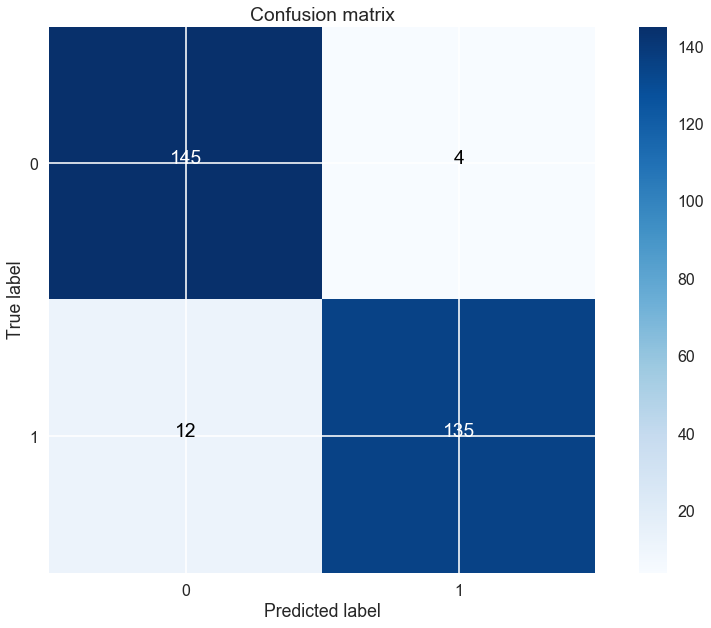

In [113]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test_res,lr.predict(X_test_res))
np.set_printoptions(precision=2)

print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

/Users/sdhankhad/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Random Forest accuracy score:0.942567567568
:[[144   5]
 [ 12 135]]
             precision    recall  f1-score   support

          0       0.92      0.97      0.94       149
          1       0.96      0.92      0.94       147

avg / total       0.94      0.94      0.94       296



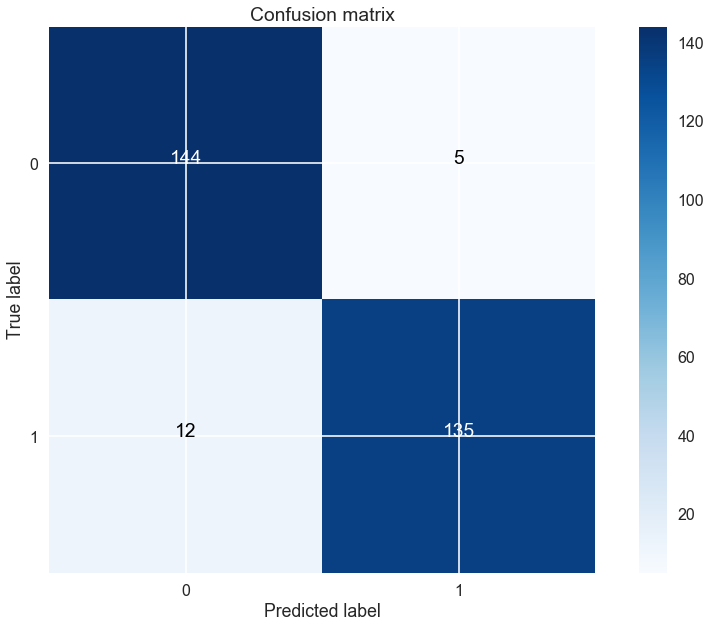

In [114]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(n_estimators=100)
rf.fit(X_train_res,y_train_res)
testscoreRF=accuracy_score(y_test_res,rf.predict(X_test_res))
cmrf=confusion_matrix(y_test_res,rf.predict(X_test_res))
print('Random Forest accuracy score:'+str(testscoreRF))
print(':'+str(cmrf))
print(classification_report(y_test_res,rf.predict(X_test_res)))
plot_confusion_matrix(cmrf,class_names)

In [104]:
#Decision tree
from sklearn import tree
dt = tree.DecisionTreeClassifier(max_depth=3)
dt.fit(X_train_res,y_train_res)
testscoreDT=accuracy_score(y_test_res,dt.predict(X_test_res))
print('Decision Tree accuracy score:'+str(testscoreDT))
print(confusion_matrix(y_test_res,dt.predict(X_test_res)))
print(classification_report(y_test_res,dt.predict(X_test_res)))

Decision Tree accuracy score:0.932432432432
[[142   7]
 [ 13 134]]
             precision    recall  f1-score   support

          0       0.92      0.95      0.93       149
          1       0.95      0.91      0.93       147

avg / total       0.93      0.93      0.93       296



In [105]:
#Gaussian navie bayers
nb=GaussianNB()
nb.fit(X_train_res,y_train_res)
testscoreNB=accuracy_score(y_test_res,nb.predict(X_test_res))
print('Gaussian Navie Bayers accuracy score:'+str(testscoreNB))
print(confusion_matrix(y_test_res,nb.predict(X_test_res)))
print(classification_report(y_test_res,nb.predict(X_test_res)))

Gaussian Navie Bayers accuracy score:0.891891891892
[[140   9]
 [ 23 124]]
             precision    recall  f1-score   support

          0       0.86      0.94      0.90       149
          1       0.93      0.84      0.89       147

avg / total       0.90      0.89      0.89       296



In [68]:
#KNN
kn=KNeighborsClassifier()
kn.fit(X_train_res,y_train_res)
testscoreKN=accuracy_score(y_test_res,kn.predict(X_test_res))
print('KNN accuracy score:'+str(testscoreKN))
print(confusion_matrix(y_test_res,kn.predict(X_test_res)))
print(classification_report(y_test_res,kn.predict(X_test_res)))

KNN accuracy score:0.925675675676
[[143   6]
 [ 16 131]]
             precision    recall  f1-score   support

          0       0.90      0.96      0.93       149
          1       0.96      0.89      0.92       147

avg / total       0.93      0.93      0.93       296



/Users/sdhankhad/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [69]:
from sklearn.ensemble import GradientBoostingClassifier
gbm0 = GradientBoostingClassifier(random_state=10)
gbm0.fit(X_train_res,y_train_res)
testscoreGBM=accuracy_score(y_test_res,gbm0.predict(X_test_res))
print('Gradient Boosting accuracy score:'+str(testscoreGBM))
print(confusion_matrix(y_test_res,gbm0.predict(X_test_res)))
print(classification_report(y_test_res,gbm0.predict(X_test_res)))

Gradient Boosting accuracy score:0.925675675676
[[140   9]
 [ 13 134]]
             precision    recall  f1-score   support

          0       0.92      0.94      0.93       149
          1       0.94      0.91      0.92       147

avg / total       0.93      0.93      0.93       296



SVM accuracy score:0.925675675676
:[[139  10]
 [ 12 135]]
             precision    recall  f1-score   support

          0       0.92      0.93      0.93       149
          1       0.93      0.92      0.92       147

avg / total       0.93      0.93      0.93       296



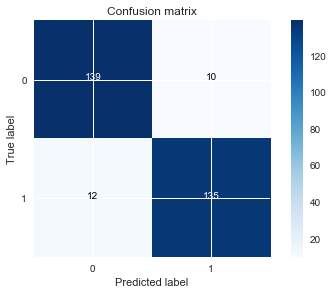

In [70]:
from sklearn import svm
sv=svm.SVC()
sv.fit(X_train_res,y_train_res)
testscoreSV=accuracy_score(y_test_res,sv.predict(X_test_res))
cm=confusion_matrix(y_test_res,sv.predict(X_test_res))
print('SVM accuracy score:'+str(testscoreSV))
print( ':'+str(cm))
print(classification_report(y_test_res,sv.predict(X_test_res)))
plot_confusion_matrix(cm,class_names)

In [71]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(solver='lbfgs', alpha=1e-5,
                   hidden_layer_sizes=(5, 2), random_state=1)
mlp.fit(X_train_res,y_train_res)
testscoreMLP=accuracy_score(y_test_res,mlp.predict(X_test_res))
print('Neural Network accuracy score:'+str(testscoreMLP))
print(confusion_matrix(y_test_res,mlp.predict(X_test_res)))
print(classification_report(y_test_res,mlp.predict(X_test_res)))

Neural Network accuracy score:0.945945945946
[[141   8]
 [  8 139]]
             precision    recall  f1-score   support

          0       0.95      0.95      0.95       149
          1       0.95      0.95      0.95       147

avg / total       0.95      0.95      0.95       296



In [72]:
#Arrrange the model according tp there accuracy score
models = pd.DataFrame({'Model' : [ 'random Forest', 'Decision Tree', 'Logistic Regression', 'KNN Regression','Gaussian Naive Bays','XGS Booster class.','Neural Network','SVM'],'Testing_Score' : [ testscoreRF, testscoreDT, testscoreLR, testscoreKN, testscoreNB, testscoreMLP, testscoreSV, testscoreGBM ],})
models.sort_values(by='Testing_Score', ascending=False)

,Model,Testing_Score
5,XGS Booster class.,0.945946
0,random Forest,0.935811
2,Logistic Regression,0.932432
3,KNN Regression,0.925676
6,Neural Network,0.925676
7,SVM,0.925676
4,Gaussian Naive Bays,0.905405
1,Decision Tree,0.898649


In [78]:
from pandas import read_csv
from pandas import set_option

In [17]:
#using Random Forest
importances=rf.feature_importances_
f=np.argsort(importances)[::-1]
print ('feature ranking:')
for i in range(X.shape[1]):
     print ("feature no. {}: {} ({})".format(i+1,X.columns[f[i]],importances[f[i]]))

feature ranking:
feature no. 1: V14 (0.247028796715)
feature no. 2: V10 (0.109328862923)
feature no. 3: V17 (0.0819488238074)
feature no. 4: V12 (0.0702986102754)
feature no. 5: V11 (0.0688779260553)
feature no. 6: V3 (0.0609193593707)
feature no. 7: V4 (0.0603001497322)
feature no. 8: V16 (0.0506407697362)
feature no. 9: V7 (0.0417402273257)
feature no. 10: V2 (0.0261119385072)
feature no. 11: V27 (0.0160695172657)
feature no. 12: V6 (0.0156066205052)
feature no. 13: normAmount (0.0148759686622)
feature no. 14: V21 (0.0140197819236)
feature no. 15: V20 (0.0120036075805)
feature no. 16: V19 (0.0111617263045)
feature no. 17: V9 (0.0107925225506)
feature no. 18: V8 (0.00952391463441)
feature no. 19: V26 (0.00936009452836)
feature no. 20: V22 (0.00927751807535)
feature no. 21: V1 (0.00921341017944)
feature no. 22: V5 (0.00885358782004)
feature no. 23: V15 (0.00826480683568)
feature no. 24: V18 (0.00685498471075)
feature no. 25: V23 (0.00676289934755)
feature no. 26: V28 (0.00631996527492)

In [18]:
%matplotlib inline
#Import basic packages
import numpy as np 
import pandas as pd
import matplotlib as matplot
import matplotlib.pyplot as plt
import seaborn as sns


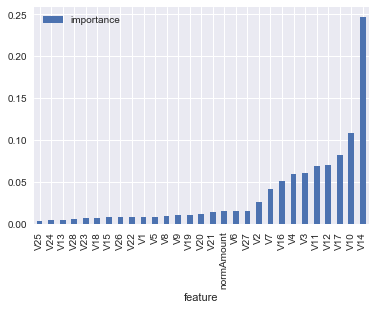

In [19]:
plt.figure(figsize=(12, 12))
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(rf.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=True).set_index('feature')
importances.plot.bar()

In [74]:
from matplotlib import pyplot
# Test options and evaluation metric
num_folds = 10
scoring = 'accuracy'

models = []
models.append(('LR' , LogisticRegression()))
models.append(('KNN' , KNeighborsClassifier()))
models.append(('DT' , tree.DecisionTreeClassifier()))
models.append(('NB' , GaussianNB()))

In [79]:
# Evaluate each algorithm for accuracy Using Cross-Validation
results = []
names = []
for name, model in models:
  kfold = KFold(n_splits=num_folds, random_state=42)
  cv_results = cross_val_score(model, X_train_res, y_train_res, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

LR: 0.940388 (0.021993)
KNN: 0.928772 (0.016485)
DT: 0.899808 (0.036780)
NB: 0.921569 (0.025956)


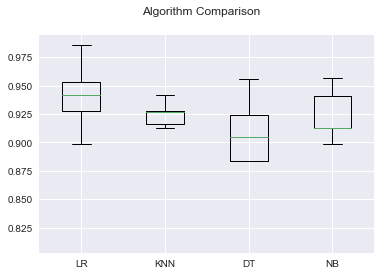

In [80]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

/Users/sdhankhad/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix



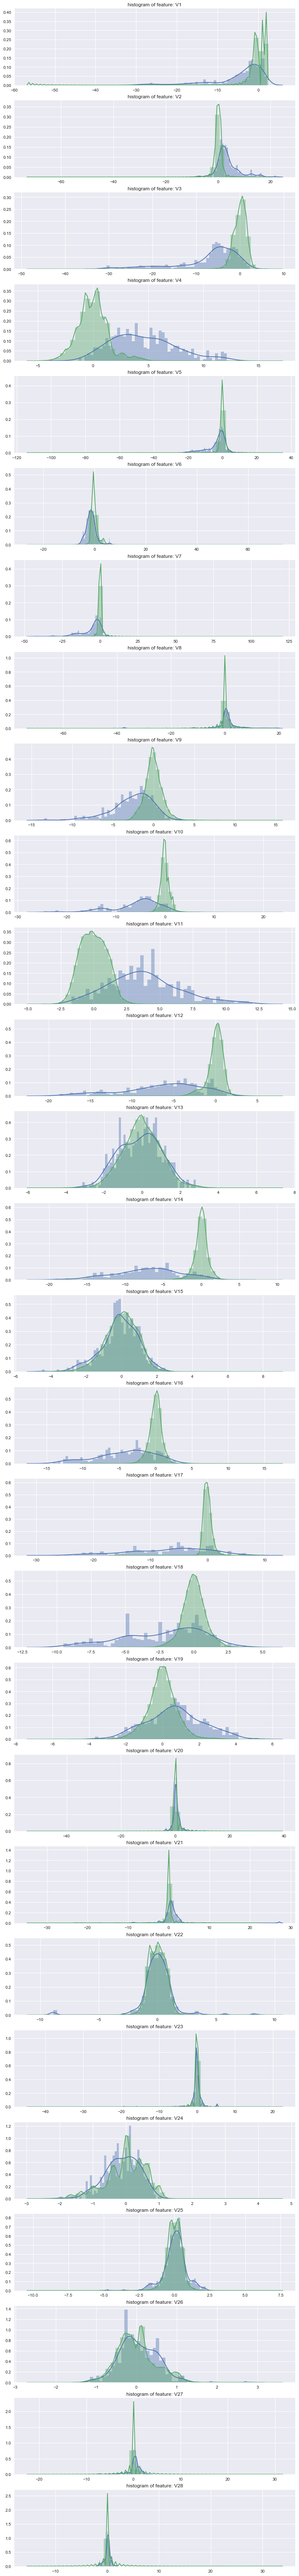

In [20]:
import matplotlib.gridspec as gridspec
plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(28, 1)
for i, cn in enumerate(data[data.ix[:,0:28].columns]):
    ax = plt.subplot(gs[i])
    sns.distplot(data[cn][data.Class == 1], bins=50)
    sns.distplot(data[cn][data.Class == 0], bins=50)
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + str(cn))
plt.show()

In [22]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

# Scatter plot 
trace = go.Scatter(
    y = rf.feature_importances_,
    x = X.columns.values,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 13,
        #size= rf.feature_importances_,
        #color = np.random.randn(500), #set color equal to a variable
        color = rf.feature_importances_,
        colorscale='Portland',
        showscale=True
    ),
    text = X.columns.values
)
data = [trace]
layout= go.Layout(
    autosize= True,
    title= 'Random Forest Feature Importance',
    hovermode= 'closest',
     xaxis= dict(
         ticklen= 5,
         showgrid=False,
        zeroline=False,
        showline=False
     ),
    yaxis=dict(
        title= 'Feature Importance',
        showgrid=False,
        zeroline=False,
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter2010')

In [28]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

# Scatter plot 
trace = go.Scatter(
    y = dt.feature_importances_,
    x = X.columns.values,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 13,
        #size= rf.feature_importances_,
        #color = np.random.randn(500), #set color equal to a variable
        color = dt.feature_importances_,
        colorscale='Portland',
        showscale=True
    ),
    text = X.columns.values
)
data = [trace]
layout= go.Layout(
    autosize= True,
    title= 'Decision Tree Feature Importance',
    hovermode= 'closest',
     xaxis= dict(
         ticklen= 5,
         showgrid=False,
        zeroline=False,
        showline=False
     ),
    yaxis=dict(
        title= 'Feature Importance',
        showgrid=False,
        zeroline=False,
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter2010')

In [30]:
X_train_res.to_csv('x_train.csv')
y_train_res.to_csv('y_train.csv')
X_test.to_csv('x_test.csv')
y_test.to_csv('y_test.csv')

In [31]:
def train_predict(learner, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on       
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
   
    start = time() # Get start time
    learner.fit(X_train, y_train)
    end = time() # Get end time
      
    results['train_time'] = end - start
        
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train)
    
    predictions_test_prob = learner.predict_proba(X_test)[:,1]
    predictions_train_prob = learner.predict_proba(X_train)[:,1]
    
    
    end = time() # Get end time
        
    results['pred_time'] =end - start
            
    
    results['acc_train'] = accuracy_score(y_train, predictions_train)      
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    
    results['rec_train'] = recall_score(y_train, predictions_train)      
    results['rec_test'] = recall_score(y_test, predictions_test)
    
    results['prec_train'] = precision_score(y_train, predictions_train)      
    results['prec_test'] = precision_score(y_test, predictions_test)
    
    
    results['f1_train'] = f1_score(y_train, predictions_train)
    results['f1_test'] = f1_score(y_test, predictions_test)
    
    results['auc_train'] = average_precision_score(y_train, predictions_train_prob,average='weighted')
    results['auc_test'] = average_precision_score(y_test, predictions_test_prob,average='weighted')
    
    
       
    # Success
    print("{} trained in time {:.4f} ".format(learner.__class__.__name__,(end - start)))
        
    # Return the results
    return results

In [32]:

from sklearn.model_selection  import train_test_split,KFold, cross_val_score,GridSearchCV

from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,\
recall_score,classification_report,accuracy_score,precision_score,f1_score,make_scorer,average_precision_score
from imblearn.over_sampling import SMOTE
from time import time

import seaborn as sns
from matplotlib.colors import ListedColormap
import imp
%matplotlib inline

In [33]:
# Initialize and let train the model train the models
clf_lr = LogisticRegression(random_state=0)
clf_rf = RandomForestClassifier(random_state=0)
clf_kn = KNeighborsClassifier()
clf_xg = GradientBoostingClassifier(random_state=10)

# Collect results on the learners
results = {}
for clf in [clf_lr, clf_kn,clf_rf,clf_xg]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    results[clf_name] = train_predict(clf, X_train_res, y_train_res.values.ravel(), X_test, y_test.values.ravel())

LogisticRegression trained in time 0.0080 
KNeighborsClassifier trained in time 4.7691 
RandomForestClassifier trained in time 0.1276 
GradientBoostingClassifier trained in time 0.2729 


In [34]:
lr_res=pd.DataFrame(results['LogisticRegression'],index=['LR'])
kn_res=pd.DataFrame(results['KNeighborsClassifier'],index=['KN'])
rf_res=pd.DataFrame(results['RandomForestClassifier'],index=['RF'])
xg_res=pd.DataFrame(results['GradientBoostingClassifier'],index=['XG'])
all_res= pd.concat([lr_res,rf_res,kn_res,xg_res])

In [35]:
#Untuned Classifiers scores
all_res[['train_time','pred_time','acc_train','acc_test','rec_train','rec_test',\
         'prec_train','prec_test','f1_train','f1_test','auc_train','auc_test']]

,train_time,pred_time,acc_train,acc_test,rec_train,rec_test,prec_train,prec_test,f1_train,f1_test,auc_train,auc_test
LR,0.007607,0.007979,0.949128,0.971525,0.915942,0.911565,0.981366,0.052467,0.947526,0.099223,0.989868,0.657853
RF,0.481828,0.127562,0.992733,0.963847,0.985507,0.952381,1.000000,0.043451,0.992701,0.083111,0.999777,0.494125
KN,0.001170,4.769145,0.946221,0.975235,0.913043,0.918367,0.978261,0.060295,0.944528,0.113160,0.989805,0.331908
XG,0.193092,0.272858,1.000000,0.951078,1.000000,0.965986,1.000000,0.032893,1.000000,0.063620,1.000000,0.662787


In [36]:
import warnings
warnings.filterwarnings("ignore", category = UserWarning, module = "matplotlib")
#
# Display inline matplotlib plots with IPython
from IPython import get_ipython
get_ipython().run_line_magic('matplotlib', 'inline')
###########################################

import matplotlib.pyplot as pl
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd
from time import time
from sklearn.metrics import f1_score, accuracy_score


def evaluate(results):
  

   # Create figure
    fig, ax = pl.subplots(2, 5, figsize = (12,7))
    tit_label={0:'Training ',1:'Testing '}

    # Constants
    bar_width = 0.2
    colors = ['#5F9EA0','#6495ED','#90EE90','#9ACD32']

    
    # Super loop to plot four panels of data
    for k, learner in enumerate(results.keys()):
        for j, metric in enumerate(['acc_train','rec_train','prec_train','f1_train','auc_train']):                 
           # Creative plot code
           ax[0, j].bar(k*bar_width, results[learner][metric], width = bar_width, color = colors[k])
           ax[0, j].set_xlim((-0.1, .9))
           ax[0,j].set_facecolor('white')
           pl.setp(ax[0,j].get_xticklabels(),visible=False)
           
        for j, metric in enumerate(['acc_test','rec_test','prec_test','f1_test','auc_test']):                 
           # Creative plot code
           ax[1, j].bar(k*bar_width, results[learner][metric], width = bar_width, color = colors[k])
           ax[1, j].set_xlim((-0.1, .9))
           ax[1,j].set_facecolor('white')
      
    for r in range(2):
        # Add unique y-labels
        ax[r, 0].set_ylabel("Accuracy Score")
        ax[r, 1].set_ylabel("Recall Score")
        ax[r, 2].set_ylabel("Precision score")
        ax[r, 3].set_ylabel("F1 - Score")
        ax[r, 4].set_ylabel("AUC-score")
        # Add titles
        ax[r, 0].set_title(tit_label[r]+"Accuracy Score")
        ax[r, 1].set_title(tit_label[r]+"Recall Score")
        ax[r, 2].set_title(tit_label[r]+"Precision score")
        ax[r, 3].set_title(tit_label[r]+"F1 - Score")
        ax[r, 4].set_title(tit_label[r]+"AUC-score")

    # Create patches for the legend
    patches = []
    for i, learner in enumerate(results.keys()):
        patches.append(mpatches.Patch(color = colors[i], label = learner))
        pl.legend(handles = patches, bbox_to_anchor = (-2, 2.4), \
               loc = 'upper center', borderaxespad = 0., ncol = 4, fontsize = 'x-large')
    

    # Aesthetics
    pl.suptitle("Performance Metrics for Four Supervised Learning Models", fontsize = 16, y = 1.10)
    pl.tight_layout()
    pl.show()
    

def comp_stats(results):
  
    # Create figure
    fig, ax = pl.subplots(1, 1, figsize = (4,4))
    tit_label={0:'Training ',1:'Testing '}

    # Constants
    bar_width = 0.2
    colors = ['c','g']
    start_l=-0.2

    
    # Super loop to plot four panels of data
    for k, learner in enumerate(results.keys()):
        if (k==0):
          bar_l=-0.6
        else:
          bar_l=-0.4
        for j, metric in enumerate(['acc_test','rec_test','prec_test','f1_test','auc_test']):                 
           bar_l=bar_l+.6 
           ax.bar(bar_l, results[learner][metric], width = bar_width, color = colors[k])
           

    ax.set_xlim((0, 3))
    ax.set_xticks([.2, .8, 1.4,2,2.6])
    ax.set_xticklabels(["Accuracy", "Recall", "Precision","F1","AUC"])
    ax.set_ylabel("Score")
    ax.set_facecolor('white')   
    # Create patches for the legend
    patches = []
    for i, learner in enumerate(results.keys()):
        patches.append(mpatches.Patch(color = colors[i], label = learner))
        pl.legend(handles = patches, bbox_to_anchor = (0.4, 1.22), \
               loc = 'upper center', borderaxespad = 0., ncol = 2, fontsize = 10)
    
    rects = ax.patches
    labels=[]

     # Super loop to plot four panels of data
    for k, learner in enumerate(results.keys()):
        for j, metric in enumerate(['acc_test','rec_test','prec_test','f1_test','auc_test']):                 
           labels.append("%.4f" % results[learner][metric])

    for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, height*1.02, label, ha='center', va='bottom',rotation='vertical')



    # Aesthetics
    pl.suptitle("Metrics for Tuned Models", fontsize = 14, y = 1.20)
    pl.tight_layout()
    pl.show()
    

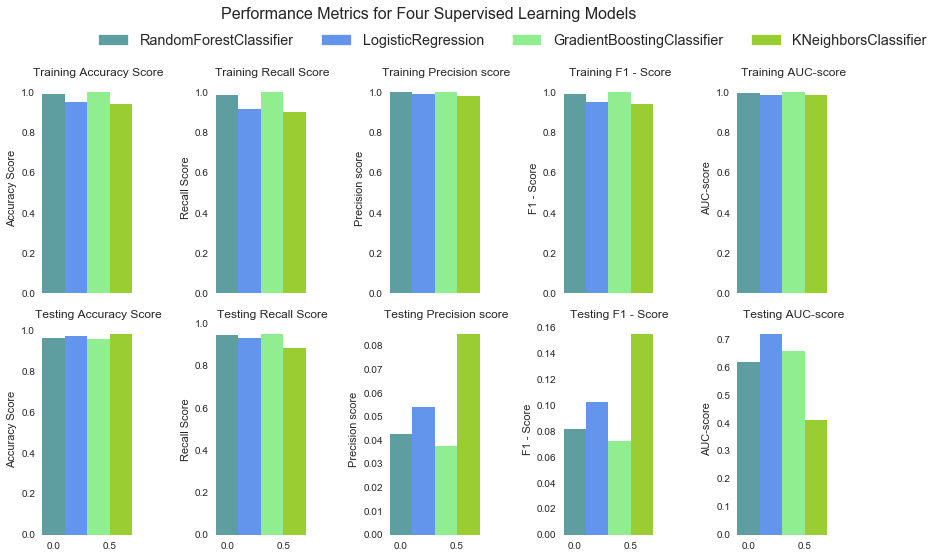

In [36]:
evaluate(results)

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold, cross_val_score
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report 

Resampling trining and testing data